# Web Scraping

In [142]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [143]:
url = "http://www.popvortex.com/music/charts/top-100-songs.php"

In [144]:
response = requests.get(url)
response.status_code

200

In [145]:
#response.content

In [146]:
soup = BeautifulSoup(response.content, "html.parser")

In [147]:
#soup

In [148]:
#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p

In [149]:
#soup.select('#chart-position-1')

In [150]:
soup.cite['class']

['title']

In [151]:
#soup.select('.title')

In [152]:
# for item in soup.select('.title'):
#     print(item.get_text())

In [153]:
# for item in soup.select('.artist'):
#     print(item.get_text())

## Creating DataFrame for first 100 songs

In [154]:
title = []
artist = []


    
tlist = soup.select('.title')
alist = soup.select('.artist')


num_iter = len(soup.select(".title"))

for i in range(num_iter):
    title.append(tlist[i].get_text())
    artist.append(alist[i].get_text())    
    

In [155]:
# title

In [156]:
song_df = pd.DataFrame({'song':title, 'artist':artist})

In [157]:
song_df

,song,artist
0,EDGING,blink-182
1,Unholy,Sam Smith & Kim Petras
2,Face It Alone,Queen
3,I'm Good (Blue),David Guetta & Bebe Rexha
4,Thank God,Kane Brown & Katelyn Brown
...,...,...
95,Save Me,Jelly Roll
96,You Should Probably Leave,Chris Stapleton
97,We Run This,Missy Elliott
98,Calm Down,Rema & Selena Gomez


## Adding top songs from 1989 to DataFrame 

I decided to not include the top songs from 1989 as I only want the top 100 songs from now. 
So I will comment out the code below

In [158]:
# url2 = "https://digitaldreamdoor.com/pages/bg_hits/bg_hits_89.html"

In [159]:
# response2 = requests.get(url2)
# response2.status_code

In [160]:
# soup2 = BeautifulSoup(response2.content, "html.parser")

In [161]:
# soup2.select('body > table > tbody > tr:nth-child(2) > td > table > tbody > tr:nth-child(4) > td > table > tbody > tr:nth-child(2)')

In [162]:
# title2 = []
# artist2 = []


    
# tlist2 = soup2.select('.s2')
# alist2 = soup2.select('.s3')


# num_iter2 = len(soup2.select(".s2"))

# for i in range(num_iter):
#     title2.append(tlist2[i].get_text())
#     artist2.append(alist2[i].get_text()) 

In [163]:
# more_songs = pd.DataFrame({'song':title2, 'artist':artist2})
# more_songs

Cleaning the \n from my Dataframe

In [164]:
# song_lst = []
# for i in more_songs['song']:
#     if '\n' in i:
#         i = i.split('\n')[0]
#         song_lst.append(i)
        
# more_songs['song'] = song_lst        
# more_songs['song']

In [165]:
# art_lst = []
# for i in more_songs['artist']:
#     if '\n' in i:
#         i = i.split('\n')[0]
#         art_lst.append(i)
        
# more_songs['artist'] = art_lst        
# more_songs['artist']

In [166]:
# more_songs

Concat both Dataframes

In [167]:
# song_df = pd.concat([song_df, more_songs], axis=0).reset_index()

In [168]:
song_df

,song,artist
0,EDGING,blink-182
1,Unholy,Sam Smith & Kim Petras
2,Face It Alone,Queen
3,I'm Good (Blue),David Guetta & Bebe Rexha
4,Thank God,Kane Brown & Katelyn Brown
...,...,...
95,Save Me,Jelly Roll
96,You Should Probably Leave,Chris Stapleton
97,We Run This,Missy Elliott
98,Calm Down,Rema & Selena Gomez


In [169]:
# song_df = song_df.drop(['index'], axis=1)
# song_df

# Song Recommender

In [176]:
import random

In [194]:
def recommender100(df):    
    random_song = random.choice(df['song'])
    user_input = input("What is your favourite song?: ")
    if user_input.lower() == random_song.lower():
        random_song = random.choice(df['song']) 
    if user_input.lower() in df['song'].str.lower().values:
        print("We recommend the following song: ", random_song)
        again = input("Do you want to enter another song? y/n ")
        if again.lower() == 'y':
            recommender()
        else:
            print('Thank you for using our song recommender!')    
    else:
        print("We are sorry but we have no songs to recommend")
        again = input("Do you want to enter another song? y/n ")
        if again.lower() == 'y':
            recommender()
        else:
            print('Thank you for using our song recommender!')

In [178]:
recommender100(song_df)

What is your favourite song?: unholy
We recommend the following song:  Shivers
Do you want to enter another song? y/n n
Thank you for using our song recommender!


# Collection Playlists from Spotify

In [75]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
from time import sleep

Making connection 

In [76]:
secrets_file = open(r"C:\Users\jasmi\Ironhack\secrets.txt","r")
string = secrets_file.read()

In [77]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [78]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

getting the playlists

In [79]:
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3000)/1000)
    return tracks

In [80]:
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

In [81]:
def get_name_artists_from_track(track):
    return [(track["name"],artist["name"],track["uri"]) for artist in track["artists"]]

In [82]:
def get_name_artist_from_playlist_item(playlist_item):
    return get_name_artists_from_track(playlist_item['track'])

In [89]:
def get_name_artists_from_playlist(input_playlist):
    return flatten(list(map(get_name_artist_from_playlist_item,input_playlist["items"])))

### 1st Playlist

In [83]:
# playlist1 = sp.user_playlist_tracks("spotify", "6Zf2l42EnOdAEwD2BlbmMl")

In [90]:
# playlist1 = get_name_artists_from_playlist(playlist1)

In [102]:
playlist1 = get_playlist_tracks("6Zf2l42EnOdAEwD2BlbmMl")

In [103]:
playlst_1 = list(map(get_name_artist_from_playlist_item,playlist1))

In [106]:
playlst1 = flatten(playlst_1)

In [153]:
# playlst1

In [108]:
df_1 = pd.DataFrame(playlst1)
df_1

,0,1,2
0,(You Drive Me) Crazy,Britney Spears,spotify:track:1DSJNBNhGZCigg9ll5VeZv
1,Barbie Girl,Aqua,spotify:track:5ZrDlcxIDZyjOzHdYW1ydr
2,Coco Jamboo,Mr. President,spotify:track:5fRvePkRGdpn2nKacG7I6d
3,Irresistible,Jessica Simpson,spotify:track:20NKCc2ag4FT1DLk0C2oT5
4,Uptown Girl - Radio Edit,Westlife,spotify:track:2sFp6E7lNBbblJGmUtCfFH
...,...,...,...
62,Baby,Justin Bieber,spotify:track:6epn3r7S14KUqlReYr77hA
63,Baby,Ludacris,spotify:track:6epn3r7S14KUqlReYr77hA
64,Battlefield,Jordin Sparks,spotify:track:4hJNA7VCBfNDly2Lz1SKAt
65,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,spotify:track:0qOnSQQF0yzuPWsXrQ9paz


In [110]:
audio1 = []

for x in df_1[2]:
    audio1.append(sp.audio_features(x))

In [111]:
audio1 = flatten(audio1)

In [112]:
audio1_df = pd.DataFrame(audio1)

In [113]:
audio1_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.748,0.939,0,-4.288,0,0.0341,0.05340,0.000000,0.3200,0.960,104.001,audio_features,1DSJNBNhGZCigg9ll5VeZv,spotify:track:1DSJNBNhGZCigg9ll5VeZv,https://api.spotify.com/v1/tracks/1DSJNBNhGZCi...,https://api.spotify.com/v1/audio-analysis/1DSJ...,198067,4
1,0.812,0.879,1,-10.998,0,0.0397,0.01670,0.224000,0.3660,0.962,129.991,audio_features,5ZrDlcxIDZyjOzHdYW1ydr,spotify:track:5ZrDlcxIDZyjOzHdYW1ydr,https://api.spotify.com/v1/tracks/5ZrDlcxIDZyj...,https://api.spotify.com/v1/audio-analysis/5ZrD...,197960,4
2,0.832,0.838,1,-5.414,0,0.0421,0.07910,0.000000,0.1520,0.965,100.021,audio_features,5fRvePkRGdpn2nKacG7I6d,spotify:track:5fRvePkRGdpn2nKacG7I6d,https://api.spotify.com/v1/tracks/5fRvePkRGdpn...,https://api.spotify.com/v1/audio-analysis/5fRv...,218733,4
3,0.657,0.965,8,-2.771,0,0.0556,0.02850,0.000088,0.0552,0.669,93.013,audio_features,20NKCc2ag4FT1DLk0C2oT5,spotify:track:20NKCc2ag4FT1DLk0C2oT5,https://api.spotify.com/v1/tracks/20NKCc2ag4FT...,https://api.spotify.com/v1/audio-analysis/20NK...,194027,4
4,0.645,0.921,6,-5.256,0,0.0302,0.00809,0.000011,0.4070,0.864,129.000,audio_features,2sFp6E7lNBbblJGmUtCfFH,spotify:track:2sFp6E7lNBbblJGmUtCfFH,https://api.spotify.com/v1/tracks/2sFp6E7lNBbb...,https://api.spotify.com/v1/audio-analysis/2sFp...,186440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.728,0.859,5,-5.237,0,0.1370,0.04010,0.000000,0.1110,0.535,65.043,audio_features,6epn3r7S14KUqlReYr77hA,spotify:track:6epn3r7S14KUqlReYr77hA,https://api.spotify.com/v1/tracks/6epn3r7S14KU...,https://api.spotify.com/v1/audio-analysis/6epn...,214240,4
63,0.728,0.859,5,-5.237,0,0.1370,0.04010,0.000000,0.1110,0.535,65.043,audio_features,6epn3r7S14KUqlReYr77hA,spotify:track:6epn3r7S14KUqlReYr77hA,https://api.spotify.com/v1/tracks/6epn3r7S14KU...,https://api.spotify.com/v1/audio-analysis/6epn...,214240,4
64,0.613,0.634,2,-3.472,1,0.0339,0.01780,0.000000,0.0639,0.370,144.953,audio_features,4hJNA7VCBfNDly2Lz1SKAt,spotify:track:4hJNA7VCBfNDly2Lz1SKAt,https://api.spotify.com/v1/tracks/4hJNA7VCBfND...,https://api.spotify.com/v1/audio-analysis/4hJN...,241920,4
65,0.646,0.795,9,-3.293,1,0.0976,0.03190,0.000000,0.2670,0.796,89.990,audio_features,0qOnSQQF0yzuPWsXrQ9paz,spotify:track:0qOnSQQF0yzuPWsXrQ9paz,https://api.spotify.com/v1/tracks/0qOnSQQF0yzu...,https://api.spotify.com/v1/audio-analysis/0qOn...,210960,4


In [114]:
play_1 = pd.concat([df_1 , audio1_df], axis=1)

In [115]:
play_1

,0,1,2,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,(You Drive Me) Crazy,Britney Spears,spotify:track:1DSJNBNhGZCigg9ll5VeZv,0.748,0.939,0,-4.288,0,0.0341,0.05340,...,0.3200,0.960,104.001,audio_features,1DSJNBNhGZCigg9ll5VeZv,spotify:track:1DSJNBNhGZCigg9ll5VeZv,https://api.spotify.com/v1/tracks/1DSJNBNhGZCi...,https://api.spotify.com/v1/audio-analysis/1DSJ...,198067,4
1,Barbie Girl,Aqua,spotify:track:5ZrDlcxIDZyjOzHdYW1ydr,0.812,0.879,1,-10.998,0,0.0397,0.01670,...,0.3660,0.962,129.991,audio_features,5ZrDlcxIDZyjOzHdYW1ydr,spotify:track:5ZrDlcxIDZyjOzHdYW1ydr,https://api.spotify.com/v1/tracks/5ZrDlcxIDZyj...,https://api.spotify.com/v1/audio-analysis/5ZrD...,197960,4
2,Coco Jamboo,Mr. President,spotify:track:5fRvePkRGdpn2nKacG7I6d,0.832,0.838,1,-5.414,0,0.0421,0.07910,...,0.1520,0.965,100.021,audio_features,5fRvePkRGdpn2nKacG7I6d,spotify:track:5fRvePkRGdpn2nKacG7I6d,https://api.spotify.com/v1/tracks/5fRvePkRGdpn...,https://api.spotify.com/v1/audio-analysis/5fRv...,218733,4
3,Irresistible,Jessica Simpson,spotify:track:20NKCc2ag4FT1DLk0C2oT5,0.657,0.965,8,-2.771,0,0.0556,0.02850,...,0.0552,0.669,93.013,audio_features,20NKCc2ag4FT1DLk0C2oT5,spotify:track:20NKCc2ag4FT1DLk0C2oT5,https://api.spotify.com/v1/tracks/20NKCc2ag4FT...,https://api.spotify.com/v1/audio-analysis/20NK...,194027,4
4,Uptown Girl - Radio Edit,Westlife,spotify:track:2sFp6E7lNBbblJGmUtCfFH,0.645,0.921,6,-5.256,0,0.0302,0.00809,...,0.4070,0.864,129.000,audio_features,2sFp6E7lNBbblJGmUtCfFH,spotify:track:2sFp6E7lNBbblJGmUtCfFH,https://api.spotify.com/v1/tracks/2sFp6E7lNBbb...,https://api.spotify.com/v1/audio-analysis/2sFp...,186440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Baby,Justin Bieber,spotify:track:6epn3r7S14KUqlReYr77hA,0.728,0.859,5,-5.237,0,0.1370,0.04010,...,0.1110,0.535,65.043,audio_features,6epn3r7S14KUqlReYr77hA,spotify:track:6epn3r7S14KUqlReYr77hA,https://api.spotify.com/v1/tracks/6epn3r7S14KU...,https://api.spotify.com/v1/audio-analysis/6epn...,214240,4
63,Baby,Ludacris,spotify:track:6epn3r7S14KUqlReYr77hA,0.728,0.859,5,-5.237,0,0.1370,0.04010,...,0.1110,0.535,65.043,audio_features,6epn3r7S14KUqlReYr77hA,spotify:track:6epn3r7S14KUqlReYr77hA,https://api.spotify.com/v1/tracks/6epn3r7S14KU...,https://api.spotify.com/v1/audio-analysis/6epn...,214240,4
64,Battlefield,Jordin Sparks,spotify:track:4hJNA7VCBfNDly2Lz1SKAt,0.613,0.634,2,-3.472,1,0.0339,0.01780,...,0.0639,0.370,144.953,audio_features,4hJNA7VCBfNDly2Lz1SKAt,spotify:track:4hJNA7VCBfNDly2Lz1SKAt,https://api.spotify.com/v1/tracks/4hJNA7VCBfND...,https://api.spotify.com/v1/audio-analysis/4hJN...,241920,4
65,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,spotify:track:0qOnSQQF0yzuPWsXrQ9paz,0.646,0.795,9,-3.293,1,0.0976,0.03190,...,0.2670,0.796,89.990,audio_features,0qOnSQQF0yzuPWsXrQ9paz,spotify:track:0qOnSQQF0yzuPWsXrQ9paz,https://api.spotify.com/v1/tracks/0qOnSQQF0yzu...,https://api.spotify.com/v1/audio-analysis/0qOn...,210960,4


### 2nd Playlist

In [116]:
playlist2 = get_playlist_tracks("2QJV8b3OPIUoFQBOb2IK5U")

In [117]:
get_name_artist_from_playlist_item(playlist2[0])

[('Fuego', 'Eleni Foureira', 'spotify:track:4TwWOcvjY1qt3QJvtveAGm')]

In [118]:
playlst_2 = list(map(get_name_artist_from_playlist_item,playlist2))

In [119]:
len(playlst_2)

371

In [120]:
playlst_2= flatten(playlst_2)

In [152]:
# playlst_2

In [122]:
df_2 = pd.DataFrame(playlst_2)
df_2

,0,1,2
0,Fuego,Eleni Foureira,spotify:track:4TwWOcvjY1qt3QJvtveAGm
1,Toy,Netta,spotify:track:6n2eIfLj0wOOUkUfNmYzlh
2,Monsters,Saara Aalto,spotify:track:0JGbU6NlewrskD138Wq04b
3,Lie to Me,Mikolas Josef,spotify:track:4Ot9gTaARnRqJT1TYwM4pQ
4,Je Ne Sais Quoi (Eurovision 2010) Orginal Version,Hera Björk,spotify:track:48rIGviK0uiZKmXV6QifbE
...,...,...,...
387,SEKRET,Ronela Hajati,spotify:track:0zC65JcBBk4GYAjL2tHKXa
388,SPACE MAN,Sam Ryder,spotify:track:3nhGk6VnrDHy67pXvMhdPa
389,De Diepte,S10,spotify:track:7uQ7e7nzbtyX87eIYHpj6Z
390,SNAP,Rosa Linn,spotify:track:0QPRDC97rIQB3Jh3hrVJoH


In [123]:
audio2 = []

for x in df_2[2]:
    audio2.append(sp.audio_features(x))

In [124]:
audio2 = flatten(audio2)
audio2_df = pd.DataFrame(audio2)
audio2_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.586,0.739,11,-4.584,0,0.1050,0.05580,0.000000,0.5790,0.522,101.033,audio_features,4TwWOcvjY1qt3QJvtveAGm,spotify:track:4TwWOcvjY1qt3QJvtveAGm,https://api.spotify.com/v1/tracks/4TwWOcvjY1qt...,https://api.spotify.com/v1/audio-analysis/4TwW...,183397,4
1,0.786,0.712,3,-5.349,0,0.0678,0.07060,0.000000,0.2360,0.795,130.144,audio_features,6n2eIfLj0wOOUkUfNmYzlh,spotify:track:6n2eIfLj0wOOUkUfNmYzlh,https://api.spotify.com/v1/tracks/6n2eIfLj0wOO...,https://api.spotify.com/v1/audio-analysis/6n2e...,180231,4
2,0.581,0.731,0,-4.482,0,0.0387,0.01030,0.000000,0.0602,0.272,121.931,audio_features,0JGbU6NlewrskD138Wq04b,spotify:track:0JGbU6NlewrskD138Wq04b,https://api.spotify.com/v1/tracks/0JGbU6Nlewrs...,https://api.spotify.com/v1/audio-analysis/0JGb...,180587,4
3,0.836,0.688,6,-6.528,1,0.1210,0.00442,0.000002,0.3910,0.699,106.013,audio_features,4Ot9gTaARnRqJT1TYwM4pQ,spotify:track:4Ot9gTaARnRqJT1TYwM4pQ,https://api.spotify.com/v1/tracks/4Ot9gTaARnRq...,https://api.spotify.com/v1/audio-analysis/4Ot9...,170000,4
4,0.529,0.878,3,-4.328,0,0.0668,0.03430,0.000003,0.1720,0.285,132.033,audio_features,48rIGviK0uiZKmXV6QifbE,spotify:track:48rIGviK0uiZKmXV6QifbE,https://api.spotify.com/v1/tracks/48rIGviK0uiZ...,https://api.spotify.com/v1/audio-analysis/48rI...,180001,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.760,0.695,5,-6.088,0,0.0502,0.04510,0.004130,0.5150,0.452,100.005,audio_features,0zC65JcBBk4GYAjL2tHKXa,spotify:track:0zC65JcBBk4GYAjL2tHKXa,https://api.spotify.com/v1/tracks/0zC65JcBBk4G...,https://api.spotify.com/v1/audio-analysis/0zC6...,181117,4
388,0.467,0.828,11,-2.220,1,0.0489,0.18100,0.000000,0.1020,0.334,79.978,audio_features,3nhGk6VnrDHy67pXvMhdPa,spotify:track:3nhGk6VnrDHy67pXvMhdPa,https://api.spotify.com/v1/tracks/3nhGk6VnrDHy...,https://api.spotify.com/v1/audio-analysis/3nhG...,217320,4
389,0.502,0.397,2,-8.819,0,0.0282,0.37800,0.000034,0.1430,0.159,90.043,audio_features,7uQ7e7nzbtyX87eIYHpj6Z,spotify:track:7uQ7e7nzbtyX87eIYHpj6Z,https://api.spotify.com/v1/tracks/7uQ7e7nzbtyX...,https://api.spotify.com/v1/audio-analysis/7uQ7...,176604,4
390,0.563,0.639,0,-8.205,1,0.0684,0.10700,0.000011,0.4460,0.518,169.985,audio_features,0QPRDC97rIQB3Jh3hrVJoH,spotify:track:0QPRDC97rIQB3Jh3hrVJoH,https://api.spotify.com/v1/tracks/0QPRDC97rIQB...,https://api.spotify.com/v1/audio-analysis/0QPR...,179551,4


In [125]:
play_2 = pd.concat([df_2 , audio2_df], axis=1)

In [126]:
play_2 

,0,1,2,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Fuego,Eleni Foureira,spotify:track:4TwWOcvjY1qt3QJvtveAGm,0.586,0.739,11,-4.584,0,0.1050,0.05580,...,0.5790,0.522,101.033,audio_features,4TwWOcvjY1qt3QJvtveAGm,spotify:track:4TwWOcvjY1qt3QJvtveAGm,https://api.spotify.com/v1/tracks/4TwWOcvjY1qt...,https://api.spotify.com/v1/audio-analysis/4TwW...,183397,4
1,Toy,Netta,spotify:track:6n2eIfLj0wOOUkUfNmYzlh,0.786,0.712,3,-5.349,0,0.0678,0.07060,...,0.2360,0.795,130.144,audio_features,6n2eIfLj0wOOUkUfNmYzlh,spotify:track:6n2eIfLj0wOOUkUfNmYzlh,https://api.spotify.com/v1/tracks/6n2eIfLj0wOO...,https://api.spotify.com/v1/audio-analysis/6n2e...,180231,4
2,Monsters,Saara Aalto,spotify:track:0JGbU6NlewrskD138Wq04b,0.581,0.731,0,-4.482,0,0.0387,0.01030,...,0.0602,0.272,121.931,audio_features,0JGbU6NlewrskD138Wq04b,spotify:track:0JGbU6NlewrskD138Wq04b,https://api.spotify.com/v1/tracks/0JGbU6Nlewrs...,https://api.spotify.com/v1/audio-analysis/0JGb...,180587,4
3,Lie to Me,Mikolas Josef,spotify:track:4Ot9gTaARnRqJT1TYwM4pQ,0.836,0.688,6,-6.528,1,0.1210,0.00442,...,0.3910,0.699,106.013,audio_features,4Ot9gTaARnRqJT1TYwM4pQ,spotify:track:4Ot9gTaARnRqJT1TYwM4pQ,https://api.spotify.com/v1/tracks/4Ot9gTaARnRq...,https://api.spotify.com/v1/audio-analysis/4Ot9...,170000,4
4,Je Ne Sais Quoi (Eurovision 2010) Orginal Version,Hera Björk,spotify:track:48rIGviK0uiZKmXV6QifbE,0.529,0.878,3,-4.328,0,0.0668,0.03430,...,0.1720,0.285,132.033,audio_features,48rIGviK0uiZKmXV6QifbE,spotify:track:48rIGviK0uiZKmXV6QifbE,https://api.spotify.com/v1/tracks/48rIGviK0uiZ...,https://api.spotify.com/v1/audio-analysis/48rI...,180001,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,SEKRET,Ronela Hajati,spotify:track:0zC65JcBBk4GYAjL2tHKXa,0.760,0.695,5,-6.088,0,0.0502,0.04510,...,0.5150,0.452,100.005,audio_features,0zC65JcBBk4GYAjL2tHKXa,spotify:track:0zC65JcBBk4GYAjL2tHKXa,https://api.spotify.com/v1/tracks/0zC65JcBBk4G...,https://api.spotify.com/v1/audio-analysis/0zC6...,181117,4
388,SPACE MAN,Sam Ryder,spotify:track:3nhGk6VnrDHy67pXvMhdPa,0.467,0.828,11,-2.220,1,0.0489,0.18100,...,0.1020,0.334,79.978,audio_features,3nhGk6VnrDHy67pXvMhdPa,spotify:track:3nhGk6VnrDHy67pXvMhdPa,https://api.spotify.com/v1/tracks/3nhGk6VnrDHy...,https://api.spotify.com/v1/audio-analysis/3nhG...,217320,4
389,De Diepte,S10,spotify:track:7uQ7e7nzbtyX87eIYHpj6Z,0.502,0.397,2,-8.819,0,0.0282,0.37800,...,0.1430,0.159,90.043,audio_features,7uQ7e7nzbtyX87eIYHpj6Z,spotify:track:7uQ7e7nzbtyX87eIYHpj6Z,https://api.spotify.com/v1/tracks/7uQ7e7nzbtyX...,https://api.spotify.com/v1/audio-analysis/7uQ7...,176604,4
390,SNAP,Rosa Linn,spotify:track:0QPRDC97rIQB3Jh3hrVJoH,0.563,0.639,0,-8.205,1,0.0684,0.10700,...,0.4460,0.518,169.985,audio_features,0QPRDC97rIQB3Jh3hrVJoH,spotify:track:0QPRDC97rIQB3Jh3hrVJoH,https://api.spotify.com/v1/tracks/0QPRDC97rIQB...,https://api.spotify.com/v1/audio-analysis/0QPR...,179551,4


### 3rd Playlist

In [127]:
playlist3 = get_playlist_tracks('0gqrnk12Q8OExuCeKyBRCq')

In [128]:
playlst_3 = list(map(get_name_artist_from_playlist_item,playlist3))

In [129]:
playlst_3 = flatten(playlst_3)

In [130]:
len(playlst_3)

514

In [151]:
# playlst_3

In [132]:
df_3 = pd.DataFrame(playlst_3)
df_3

,0,1,2
0,September,"Earth, Wind & Fire",spotify:track:5nNmj1cLH3r4aA4XDJ2bgY
1,All Star,Smash Mouth,spotify:track:22c2pt75xtnDddA5Zlm0yy
2,Where Is The Love?,Black Eyed Peas,spotify:track:0uqPG793dkDDN7sCUJJIVC
3,Californication,Red Hot Chili Peppers,spotify:track:48UPSzbZjgc449aqz8bxox
4,I Gotta Feeling,Black Eyed Peas,spotify:track:70cTMpcgWMcR18t9MRJFjB
...,...,...,...
509,Need You Tonight,INXS,spotify:track:3h04eZTnmFLRMjZajbrp2R
510,Wavin' Flag - Coca-Cola® Celebration Mix,K'NAAN,spotify:track:6WFQsZZa81anp9BkqZMyTb
511,Listen To Your Heart,Roxette,spotify:track:5JvsxPAHsGxwNq4xto2HtM
512,"Burning Heart - From ""Rocky IV"" Soundtrack",Survivor,spotify:track:2VN7uPrbryJ7nE2MXX3f9a


In [133]:
audio3 = []

for x in df_3[2]:
    audio3.append(sp.audio_features(x))

In [134]:
audio3 = flatten(audio3)
audio3_df = pd.DataFrame(audio3)
audio3_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.697,0.809,9,-8.197,1,0.0302,0.1140,0.000521,0.1830,0.980,125.941,audio_features,5nNmj1cLH3r4aA4XDJ2bgY,spotify:track:5nNmj1cLH3r4aA4XDJ2bgY,https://api.spotify.com/v1/tracks/5nNmj1cLH3r4...,https://api.spotify.com/v1/audio-analysis/5nNm...,214827,4
1,0.730,0.862,11,-5.876,1,0.0313,0.0398,0.000000,0.0818,0.770,104.018,audio_features,22c2pt75xtnDddA5Zlm0yy,spotify:track:22c2pt75xtnDddA5Zlm0yy,https://api.spotify.com/v1/tracks/22c2pt75xtnD...,https://api.spotify.com/v1/audio-analysis/22c2...,200560,4
2,0.835,0.687,5,-3.180,1,0.1840,0.1010,0.000000,0.1320,0.828,94.059,audio_features,0uqPG793dkDDN7sCUJJIVC,spotify:track:0uqPG793dkDDN7sCUJJIVC,https://api.spotify.com/v1/tracks/0uqPG793dkDD...,https://api.spotify.com/v1/audio-analysis/0uqP...,272533,4
3,0.592,0.767,9,-2.788,0,0.0270,0.0021,0.001650,0.1270,0.328,96.483,audio_features,48UPSzbZjgc449aqz8bxox,spotify:track:48UPSzbZjgc449aqz8bxox,https://api.spotify.com/v1/tracks/48UPSzbZjgc4...,https://api.spotify.com/v1/audio-analysis/48UP...,329733,4
4,0.743,0.766,0,-6.375,1,0.0265,0.0873,0.000000,0.5090,0.610,127.960,audio_features,70cTMpcgWMcR18t9MRJFjB,spotify:track:70cTMpcgWMcR18t9MRJFjB,https://api.spotify.com/v1/tracks/70cTMpcgWMcR...,https://api.spotify.com/v1/audio-analysis/70cT...,289133,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.795,0.630,10,-7.217,0,0.0841,0.0419,0.575000,0.0894,0.785,108.701,audio_features,3h04eZTnmFLRMjZajbrp2R,spotify:track:3h04eZTnmFLRMjZajbrp2R,https://api.spotify.com/v1/tracks/3h04eZTnmFLR...,https://api.spotify.com/v1/audio-analysis/3h04...,181107,4
510,0.583,0.791,0,-4.192,1,0.0644,0.3090,0.000000,0.0996,0.615,151.869,audio_features,6WFQsZZa81anp9BkqZMyTb,spotify:track:6WFQsZZa81anp9BkqZMyTb,https://api.spotify.com/v1/tracks/6WFQsZZa81an...,https://api.spotify.com/v1/audio-analysis/6WFQ...,212507,4
511,0.539,0.583,1,-4.935,0,0.0275,0.1080,0.000000,0.1110,0.337,86.063,audio_features,5JvsxPAHsGxwNq4xto2HtM,spotify:track:5JvsxPAHsGxwNq4xto2HtM,https://api.spotify.com/v1/tracks/5JvsxPAHsGxw...,https://api.spotify.com/v1/audio-analysis/5Jvs...,328093,4
512,0.652,0.609,9,-9.684,0,0.0280,0.2980,0.000009,0.0573,0.646,98.125,audio_features,2VN7uPrbryJ7nE2MXX3f9a,spotify:track:2VN7uPrbryJ7nE2MXX3f9a,https://api.spotify.com/v1/tracks/2VN7uPrbryJ7...,https://api.spotify.com/v1/audio-analysis/2VN7...,230107,4


In [135]:
play_3 = pd.concat([df_3 , audio3_df], axis=1)

### 4th Playlist

In [136]:
playlist4 = get_playlist_tracks('77CxoauZX3xv8VsfVwPJxT')

In [137]:
playlst_4 = list(map(get_name_artist_from_playlist_item,playlist4))

In [138]:
playlst_4 = flatten(playlst_4)

In [139]:
len(playlst_4)

2528

In [140]:
df_4 = pd.DataFrame(playlst_4)
df_4

,0,1,2
0,Like I Love You,Lost Frequencies,spotify:track:4sh506lJZac1T4o4NqtIuS
1,Like I Love You,The NGHBRS,spotify:track:4sh506lJZac1T4o4NqtIuS
2,Lost In Japan - Remix,Shawn Mendes,spotify:track:575NJxNUVDqwJGdzBrlLbv
3,Lost In Japan - Remix,Zedd,spotify:track:575NJxNUVDqwJGdzBrlLbv
4,IDGAF,Dua Lipa,spotify:track:76cy1WJvNGJTj78UqeA5zr
...,...,...,...
2523,Okee Shordy,Chivv,spotify:track:4RCKxit6c2kl7dwJPKT3hc
2524,Okee Shordy,ADF Samski,spotify:track:4RCKxit6c2kl7dwJPKT3hc
2525,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),SICK CVNT,spotify:track:2dSNs47vHBSPnsUwpl39nk
2526,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),SPED UP SICK CVNT,spotify:track:2dSNs47vHBSPnsUwpl39nk


In [143]:
audio4 = []

for x in df_4[2]:
    audio4.append(sp.audio_features(x))

In [144]:
audio4 = flatten(audio4)
audio4_df = pd.DataFrame(audio4)
audio4_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.863,0.588,1,-7.141,1,0.0847,0.1420,0.000034,0.4570,0.751,117.911,audio_features,4sh506lJZac1T4o4NqtIuS,spotify:track:4sh506lJZac1T4o4NqtIuS,https://api.spotify.com/v1/tracks/4sh506lJZac1...,https://api.spotify.com/v1/audio-analysis/4sh5...,190174,4
1,0.863,0.588,1,-7.141,1,0.0847,0.1420,0.000034,0.4570,0.751,117.911,audio_features,4sh506lJZac1T4o4NqtIuS,spotify:track:4sh506lJZac1T4o4NqtIuS,https://api.spotify.com/v1/tracks/4sh506lJZac1...,https://api.spotify.com/v1/audio-analysis/4sh5...,190174,4
2,0.706,0.855,10,-5.377,1,0.2150,0.0911,0.000000,0.3470,0.293,107.184,audio_features,575NJxNUVDqwJGdzBrlLbv,spotify:track:575NJxNUVDqwJGdzBrlLbv,https://api.spotify.com/v1/tracks/575NJxNUVDqw...,https://api.spotify.com/v1/audio-analysis/575N...,201253,4
3,0.706,0.855,10,-5.377,1,0.2150,0.0911,0.000000,0.3470,0.293,107.184,audio_features,575NJxNUVDqwJGdzBrlLbv,spotify:track:575NJxNUVDqwJGdzBrlLbv,https://api.spotify.com/v1/tracks/575NJxNUVDqw...,https://api.spotify.com/v1/audio-analysis/575N...,201253,4
4,0.836,0.544,7,-5.975,1,0.0943,0.0403,0.000000,0.0824,0.510,97.028,audio_features,76cy1WJvNGJTj78UqeA5zr,spotify:track:76cy1WJvNGJTj78UqeA5zr,https://api.spotify.com/v1/tracks/76cy1WJvNGJT...,https://api.spotify.com/v1/audio-analysis/76cy...,217947,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,0.855,0.698,8,-5.818,1,0.1220,0.2380,0.000000,0.0843,0.723,126.087,audio_features,4RCKxit6c2kl7dwJPKT3hc,spotify:track:4RCKxit6c2kl7dwJPKT3hc,https://api.spotify.com/v1/tracks/4RCKxit6c2kl...,https://api.spotify.com/v1/audio-analysis/4RCK...,150477,4
2524,0.855,0.698,8,-5.818,1,0.1220,0.2380,0.000000,0.0843,0.723,126.087,audio_features,4RCKxit6c2kl7dwJPKT3hc,spotify:track:4RCKxit6c2kl7dwJPKT3hc,https://api.spotify.com/v1/tracks/4RCKxit6c2kl...,https://api.spotify.com/v1/audio-analysis/4RCK...,150477,4
2525,0.554,0.874,1,-5.199,1,0.0480,0.2350,0.000000,0.3180,0.617,102.167,audio_features,2dSNs47vHBSPnsUwpl39nk,spotify:track:2dSNs47vHBSPnsUwpl39nk,https://api.spotify.com/v1/tracks/2dSNs47vHBSP...,https://api.spotify.com/v1/audio-analysis/2dSN...,94000,4
2526,0.554,0.874,1,-5.199,1,0.0480,0.2350,0.000000,0.3180,0.617,102.167,audio_features,2dSNs47vHBSPnsUwpl39nk,spotify:track:2dSNs47vHBSPnsUwpl39nk,https://api.spotify.com/v1/tracks/2dSNs47vHBSP...,https://api.spotify.com/v1/audio-analysis/2dSN...,94000,4


In [145]:
play_4 = pd.concat([df_4 , audio4_df], axis=1)

### 5th Playlist

In [146]:
playlist5 = get_playlist_tracks("4rnleEAOdmFAbRcNCgZMpY")

In [147]:
playlst_5 = list(map(get_name_artist_from_playlist_item,playlist5))

In [148]:
playlst_5 = flatten(playlst_5)

In [150]:
# playlst_5

In [154]:
df_5 = pd.DataFrame(playlst_5)
df_5

,0,1,2
0,Take Me To Church,Hozier,spotify:track:7dS5EaCoMnN7DzlpT6aRn2
1,Cooler Than Me - Single Mix,Mike Posner,spotify:track:2V4bv1fNWfTcyRJKmej6Sj
2,Cooler Than Me - Single Mix,Gigamesh,spotify:track:2V4bv1fNWfTcyRJKmej6Sj
3,See You Again (feat. Kali Uchis),"Tyler, The Creator",spotify:track:7KA4W4McWYRpgf0fWsJZWB
4,See You Again (feat. Kali Uchis),Kali Uchis,spotify:track:7KA4W4McWYRpgf0fWsJZWB
...,...,...,...
7722,deja vu,Olivia Rodrigo,spotify:track:61KpQadow081I2AsbeLcsb
7723,WHOLE LOTTA MONEY,BIA,spotify:track:5yorXJWdBan1Vlh116ZtQ7
7724,Slumber Party (feat. Princess Nokia),Ashnikko,spotify:track:11ZulcYY4lowvcQm4oe3VJ
7725,Slumber Party (feat. Princess Nokia),Princess Nokia,spotify:track:11ZulcYY4lowvcQm4oe3VJ


In [156]:
audio5 = []

for x in df_5[2]:
    audio5.append(sp.audio_features(x))

In [157]:
audio5 = flatten(audio5)
audio5_df = pd.DataFrame(audio5)
audio5_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
3,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
4,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7722,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088,audio_features,61KpQadow081I2AsbeLcsb,spotify:track:61KpQadow081I2AsbeLcsb,https://api.spotify.com/v1/tracks/61KpQadow081...,https://api.spotify.com/v1/audio-analysis/61Kp...,215508,4
7723,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008,audio_features,5yorXJWdBan1Vlh116ZtQ7,spotify:track:5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,https://api.spotify.com/v1/audio-analysis/5yor...,156005,4
7724,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012,audio_features,11ZulcYY4lowvcQm4oe3VJ,spotify:track:11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,https://api.spotify.com/v1/audio-analysis/11Zu...,178405,4
7725,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012,audio_features,11ZulcYY4lowvcQm4oe3VJ,spotify:track:11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,https://api.spotify.com/v1/audio-analysis/11Zu...,178405,4


In [158]:
play_5 = pd.concat([df_5 , audio5_df], axis=1)

### More playlists

I will use another notebook to add more playlists as I am running into problems using this one and hope it will help

### Putting all playlists together

In [159]:
all_songs = pd.concat([play_1, play_2,play_3,play_4,play_5], axis=0)

In [160]:
len(all_songs)

11228

I will now remove duplicates and change header names

In [161]:
all_songs = all_songs.drop_duplicates()

In [162]:
len(all_songs)

10320

In [163]:
all_songs

,0,1,2,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,(You Drive Me) Crazy,Britney Spears,spotify:track:1DSJNBNhGZCigg9ll5VeZv,0.748,0.939,0,-4.288,0,0.0341,0.053400,...,0.3200,0.960,104.001,audio_features,1DSJNBNhGZCigg9ll5VeZv,spotify:track:1DSJNBNhGZCigg9ll5VeZv,https://api.spotify.com/v1/tracks/1DSJNBNhGZCi...,https://api.spotify.com/v1/audio-analysis/1DSJ...,198067,4
1,Barbie Girl,Aqua,spotify:track:5ZrDlcxIDZyjOzHdYW1ydr,0.812,0.879,1,-10.998,0,0.0397,0.016700,...,0.3660,0.962,129.991,audio_features,5ZrDlcxIDZyjOzHdYW1ydr,spotify:track:5ZrDlcxIDZyjOzHdYW1ydr,https://api.spotify.com/v1/tracks/5ZrDlcxIDZyj...,https://api.spotify.com/v1/audio-analysis/5ZrD...,197960,4
2,Coco Jamboo,Mr. President,spotify:track:5fRvePkRGdpn2nKacG7I6d,0.832,0.838,1,-5.414,0,0.0421,0.079100,...,0.1520,0.965,100.021,audio_features,5fRvePkRGdpn2nKacG7I6d,spotify:track:5fRvePkRGdpn2nKacG7I6d,https://api.spotify.com/v1/tracks/5fRvePkRGdpn...,https://api.spotify.com/v1/audio-analysis/5fRv...,218733,4
3,Irresistible,Jessica Simpson,spotify:track:20NKCc2ag4FT1DLk0C2oT5,0.657,0.965,8,-2.771,0,0.0556,0.028500,...,0.0552,0.669,93.013,audio_features,20NKCc2ag4FT1DLk0C2oT5,spotify:track:20NKCc2ag4FT1DLk0C2oT5,https://api.spotify.com/v1/tracks/20NKCc2ag4FT...,https://api.spotify.com/v1/audio-analysis/20NK...,194027,4
4,Uptown Girl - Radio Edit,Westlife,spotify:track:2sFp6E7lNBbblJGmUtCfFH,0.645,0.921,6,-5.256,0,0.0302,0.008090,...,0.4070,0.864,129.000,audio_features,2sFp6E7lNBbblJGmUtCfFH,spotify:track:2sFp6E7lNBbblJGmUtCfFH,https://api.spotify.com/v1/tracks/2sFp6E7lNBbb...,https://api.spotify.com/v1/audio-analysis/2sFp...,186440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7720,Freaks,Surf Curse,spotify:track:0HUTL8i4y4MiGCPId7M7wb,0.346,0.944,9,-9.874,1,0.0485,0.000042,...,0.0546,0.403,179.630,audio_features,0HUTL8i4y4MiGCPId7M7wb,spotify:track:0HUTL8i4y4MiGCPId7M7wb,https://api.spotify.com/v1/tracks/0HUTL8i4y4Mi...,https://api.spotify.com/v1/audio-analysis/0HUT...,147036,4
7721,Hermit the Frog,MARINA,spotify:track:4Zcz6saEkOII3PlXd9gN3o,0.609,0.679,0,-4.545,1,0.0312,0.243000,...,0.1990,0.487,122.034,audio_features,4Zcz6saEkOII3PlXd9gN3o,spotify:track:4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...,https://api.spotify.com/v1/audio-analysis/4Zcz...,215960,4
7723,WHOLE LOTTA MONEY,BIA,spotify:track:5yorXJWdBan1Vlh116ZtQ7,0.897,0.371,1,-5.019,1,0.3680,0.090400,...,0.3250,0.441,81.008,audio_features,5yorXJWdBan1Vlh116ZtQ7,spotify:track:5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,https://api.spotify.com/v1/audio-analysis/5yor...,156005,4
7724,Slumber Party (feat. Princess Nokia),Ashnikko,spotify:track:11ZulcYY4lowvcQm4oe3VJ,0.964,0.398,11,-8.981,0,0.0795,0.001510,...,0.1010,0.563,105.012,audio_features,11ZulcYY4lowvcQm4oe3VJ,spotify:track:11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,https://api.spotify.com/v1/audio-analysis/11Zu...,178405,4


In [164]:
all_songs = all_songs.drop_duplicates(subset=[0, 2],keep='first')

In [165]:
all_songs.reset_index(drop=True)

,0,1,2,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,(You Drive Me) Crazy,Britney Spears,spotify:track:1DSJNBNhGZCigg9ll5VeZv,0.748,0.939,0,-4.288,0,0.0341,0.053400,...,0.3200,0.960,104.001,audio_features,1DSJNBNhGZCigg9ll5VeZv,spotify:track:1DSJNBNhGZCigg9ll5VeZv,https://api.spotify.com/v1/tracks/1DSJNBNhGZCi...,https://api.spotify.com/v1/audio-analysis/1DSJ...,198067,4
1,Barbie Girl,Aqua,spotify:track:5ZrDlcxIDZyjOzHdYW1ydr,0.812,0.879,1,-10.998,0,0.0397,0.016700,...,0.3660,0.962,129.991,audio_features,5ZrDlcxIDZyjOzHdYW1ydr,spotify:track:5ZrDlcxIDZyjOzHdYW1ydr,https://api.spotify.com/v1/tracks/5ZrDlcxIDZyj...,https://api.spotify.com/v1/audio-analysis/5ZrD...,197960,4
2,Coco Jamboo,Mr. President,spotify:track:5fRvePkRGdpn2nKacG7I6d,0.832,0.838,1,-5.414,0,0.0421,0.079100,...,0.1520,0.965,100.021,audio_features,5fRvePkRGdpn2nKacG7I6d,spotify:track:5fRvePkRGdpn2nKacG7I6d,https://api.spotify.com/v1/tracks/5fRvePkRGdpn...,https://api.spotify.com/v1/audio-analysis/5fRv...,218733,4
3,Irresistible,Jessica Simpson,spotify:track:20NKCc2ag4FT1DLk0C2oT5,0.657,0.965,8,-2.771,0,0.0556,0.028500,...,0.0552,0.669,93.013,audio_features,20NKCc2ag4FT1DLk0C2oT5,spotify:track:20NKCc2ag4FT1DLk0C2oT5,https://api.spotify.com/v1/tracks/20NKCc2ag4FT...,https://api.spotify.com/v1/audio-analysis/20NK...,194027,4
4,Uptown Girl - Radio Edit,Westlife,spotify:track:2sFp6E7lNBbblJGmUtCfFH,0.645,0.921,6,-5.256,0,0.0302,0.008090,...,0.4070,0.864,129.000,audio_features,2sFp6E7lNBbblJGmUtCfFH,spotify:track:2sFp6E7lNBbblJGmUtCfFH,https://api.spotify.com/v1/tracks/2sFp6E7lNBbb...,https://api.spotify.com/v1/audio-analysis/2sFp...,186440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Venom,Little Simz,spotify:track:3A0ITFj6kbb9CggwtPe55f,0.436,0.655,7,-8.153,1,0.1590,0.425000,...,0.3930,0.523,139.712,audio_features,3A0ITFj6kbb9CggwtPe55f,spotify:track:3A0ITFj6kbb9CggwtPe55f,https://api.spotify.com/v1/tracks/3A0ITFj6kbb9...,https://api.spotify.com/v1/audio-analysis/3A0I...,154749,4
7229,Freaks,Surf Curse,spotify:track:0HUTL8i4y4MiGCPId7M7wb,0.346,0.944,9,-9.874,1,0.0485,0.000042,...,0.0546,0.403,179.630,audio_features,0HUTL8i4y4MiGCPId7M7wb,spotify:track:0HUTL8i4y4MiGCPId7M7wb,https://api.spotify.com/v1/tracks/0HUTL8i4y4Mi...,https://api.spotify.com/v1/audio-analysis/0HUT...,147036,4
7230,Hermit the Frog,MARINA,spotify:track:4Zcz6saEkOII3PlXd9gN3o,0.609,0.679,0,-4.545,1,0.0312,0.243000,...,0.1990,0.487,122.034,audio_features,4Zcz6saEkOII3PlXd9gN3o,spotify:track:4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...,https://api.spotify.com/v1/audio-analysis/4Zcz...,215960,4
7231,WHOLE LOTTA MONEY,BIA,spotify:track:5yorXJWdBan1Vlh116ZtQ7,0.897,0.371,1,-5.019,1,0.3680,0.090400,...,0.3250,0.441,81.008,audio_features,5yorXJWdBan1Vlh116ZtQ7,spotify:track:5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,https://api.spotify.com/v1/audio-analysis/5yor...,156005,4


In [166]:
all_songs = all_songs.rename(columns={0:'song', 1:'singer', 2:'uri'})

In [167]:
all_songs

,song,singer,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,(You Drive Me) Crazy,Britney Spears,spotify:track:1DSJNBNhGZCigg9ll5VeZv,0.748,0.939,0,-4.288,0,0.0341,0.053400,...,0.3200,0.960,104.001,audio_features,1DSJNBNhGZCigg9ll5VeZv,spotify:track:1DSJNBNhGZCigg9ll5VeZv,https://api.spotify.com/v1/tracks/1DSJNBNhGZCi...,https://api.spotify.com/v1/audio-analysis/1DSJ...,198067,4
1,Barbie Girl,Aqua,spotify:track:5ZrDlcxIDZyjOzHdYW1ydr,0.812,0.879,1,-10.998,0,0.0397,0.016700,...,0.3660,0.962,129.991,audio_features,5ZrDlcxIDZyjOzHdYW1ydr,spotify:track:5ZrDlcxIDZyjOzHdYW1ydr,https://api.spotify.com/v1/tracks/5ZrDlcxIDZyj...,https://api.spotify.com/v1/audio-analysis/5ZrD...,197960,4
2,Coco Jamboo,Mr. President,spotify:track:5fRvePkRGdpn2nKacG7I6d,0.832,0.838,1,-5.414,0,0.0421,0.079100,...,0.1520,0.965,100.021,audio_features,5fRvePkRGdpn2nKacG7I6d,spotify:track:5fRvePkRGdpn2nKacG7I6d,https://api.spotify.com/v1/tracks/5fRvePkRGdpn...,https://api.spotify.com/v1/audio-analysis/5fRv...,218733,4
3,Irresistible,Jessica Simpson,spotify:track:20NKCc2ag4FT1DLk0C2oT5,0.657,0.965,8,-2.771,0,0.0556,0.028500,...,0.0552,0.669,93.013,audio_features,20NKCc2ag4FT1DLk0C2oT5,spotify:track:20NKCc2ag4FT1DLk0C2oT5,https://api.spotify.com/v1/tracks/20NKCc2ag4FT...,https://api.spotify.com/v1/audio-analysis/20NK...,194027,4
4,Uptown Girl - Radio Edit,Westlife,spotify:track:2sFp6E7lNBbblJGmUtCfFH,0.645,0.921,6,-5.256,0,0.0302,0.008090,...,0.4070,0.864,129.000,audio_features,2sFp6E7lNBbblJGmUtCfFH,spotify:track:2sFp6E7lNBbblJGmUtCfFH,https://api.spotify.com/v1/tracks/2sFp6E7lNBbb...,https://api.spotify.com/v1/audio-analysis/2sFp...,186440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7719,Venom,Little Simz,spotify:track:3A0ITFj6kbb9CggwtPe55f,0.436,0.655,7,-8.153,1,0.1590,0.425000,...,0.3930,0.523,139.712,audio_features,3A0ITFj6kbb9CggwtPe55f,spotify:track:3A0ITFj6kbb9CggwtPe55f,https://api.spotify.com/v1/tracks/3A0ITFj6kbb9...,https://api.spotify.com/v1/audio-analysis/3A0I...,154749,4
7720,Freaks,Surf Curse,spotify:track:0HUTL8i4y4MiGCPId7M7wb,0.346,0.944,9,-9.874,1,0.0485,0.000042,...,0.0546,0.403,179.630,audio_features,0HUTL8i4y4MiGCPId7M7wb,spotify:track:0HUTL8i4y4MiGCPId7M7wb,https://api.spotify.com/v1/tracks/0HUTL8i4y4Mi...,https://api.spotify.com/v1/audio-analysis/0HUT...,147036,4
7721,Hermit the Frog,MARINA,spotify:track:4Zcz6saEkOII3PlXd9gN3o,0.609,0.679,0,-4.545,1,0.0312,0.243000,...,0.1990,0.487,122.034,audio_features,4Zcz6saEkOII3PlXd9gN3o,spotify:track:4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...,https://api.spotify.com/v1/audio-analysis/4Zcz...,215960,4
7723,WHOLE LOTTA MONEY,BIA,spotify:track:5yorXJWdBan1Vlh116ZtQ7,0.897,0.371,1,-5.019,1,0.3680,0.090400,...,0.3250,0.441,81.008,audio_features,5yorXJWdBan1Vlh116ZtQ7,spotify:track:5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,https://api.spotify.com/v1/audio-analysis/5yor...,156005,4


I will now save my data in a csv file

In [168]:
all_songs.to_csv('all_songs.csv', index=False)

Concatenating this and the DF from the other file and clean up duplicates

In [6]:
all_songs = pd.read_csv('all_songs.csv')
all_songs2 = pd.read_csv('all_songs2.csv')

In [46]:
all_songs = pd.concat([all_songs, all_songs2], axis=0)
all_songs = all_songs.drop(['uri'], axis=1)

In [50]:
all_songs = all_songs.drop(['type', 'id', 'uri.1', 'track_href', 'analysis_url'], axis=1)

In [9]:
all_songs = all_songs.drop_duplicates(subset=['song', 'uri'],keep='first')

In [10]:
len(all_songs)

10484

In [51]:
all_songs

,song,singer,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,(You Drive Me) Crazy,Britney Spears,0.748,0.939,0,-4.288,0,0.0341,0.05340,0.000000,0.3200,0.960,104.001,198067,4
1,Barbie Girl,Aqua,0.812,0.879,1,-10.998,0,0.0397,0.01670,0.224000,0.3660,0.962,129.991,197960,4
2,Coco Jamboo,Mr. President,0.832,0.838,1,-5.414,0,0.0421,0.07910,0.000000,0.1520,0.965,100.021,218733,4
3,Irresistible,Jessica Simpson,0.657,0.965,8,-2.771,0,0.0556,0.02850,0.000088,0.0552,0.669,93.013,194027,4
4,Uptown Girl - Radio Edit,Westlife,0.645,0.921,6,-5.256,0,0.0302,0.00809,0.000011,0.4070,0.864,129.000,186440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3666,Let's Stay Together - Acoustic,Grace George,0.665,0.186,4,-10.151,0,0.0290,0.90200,0.000001,0.1050,0.372,82.046,231402,4
3667,Meet Me At Our Spot,The Mayries,0.396,0.306,2,-9.961,1,0.0341,0.90600,0.000000,0.2460,0.309,179.222,157821,4
3668,I Will Follow You,Toulouse,0.439,0.144,8,-17.701,1,0.0346,0.84100,0.000006,0.1870,0.246,80.445,159440,4
3669,Tiny Dancer (Acoustic),The Moon Loungers,0.619,0.357,7,-9.166,1,0.0289,0.85900,0.000978,0.1130,0.457,125.977,430784,4


I will also add a kaggle dataset so that I have more songs

In [75]:
kaggle = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')

In [76]:
kaggle = kaggle.drop(['track_id'], axis=1)

In [77]:
display(kaggle)

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


In [80]:
kaggle = kaggle.rename(columns={'artist_name' : 'singer','track_name':'song'})

In [73]:
kaggle = kaggle['song'],['singer'],['danceability'],['energy'],['key'],['loudness'],['mode'],['speechiness'],['acousticness'],['instrumentalness'],['liveness'],['valence'],['tempo'],['duration_ms'],['time_signature']

In [81]:
kaggle = kaggle.loc[:,['song','singer','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']]

In [82]:
kaggle

,song,singer,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",YG,0.743,0.339,1,-7.678,1,0.4090,0.005820,0.000,0.0812,0.1180,203.927,238373,4
1,BAND DRUM (feat. A$AP Rocky),YG,0.846,0.557,8,-7.259,1,0.4570,0.024400,0.000,0.2860,0.3710,159.009,214800,4
2,Radio Silence,R3HAB,0.603,0.723,9,-5.890,0,0.0454,0.025000,0.000,0.0824,0.3820,114.966,138913,4
3,Lactose,Chris Cooq,0.800,0.579,5,-12.118,0,0.0701,0.029400,0.912,0.0994,0.6410,123.003,125381,4
4,Same - Original mix,Chris Cooq,0.783,0.792,7,-10.277,1,0.0661,0.000035,0.878,0.0332,0.9280,120.047,124016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Come Back Home,Calum Scott,0.601,0.801,11,-5.174,1,0.0323,0.006780,0.000,0.0991,0.2890,131.049,190539,4
130659,Enough for You,Saint Claire,0.387,0.249,9,-13.233,1,0.0437,0.918000,0.000,0.1030,0.3460,94.039,194583,4
130660,Do It,Mike Stud,0.717,0.532,8,-8.351,0,0.2060,0.330000,0.000,0.0997,0.5460,156.977,139191,4
130661,No Smoke,D Savage,0.772,0.510,4,-9.670,0,0.1200,0.007900,0.000,0.1310,0.0755,120.049,180013,4


In [83]:
all_songs = pd.concat([all_songs, kaggle], axis=0)

In [84]:
len(all_songs)

148489

In [86]:
all_songs = all_songs.drop_duplicates()

In [87]:
len(all_songs)

140731

# Clustering

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler 

First I will get the numeric data and will normalize it

In [89]:
X_num = all_songs.select_dtypes(include = np.number)
X_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.748,0.939,0,-4.288,0,0.0341,0.05340,0.000000,0.3200,0.9600,104.001,198067,4
1,0.812,0.879,1,-10.998,0,0.0397,0.01670,0.224000,0.3660,0.9620,129.991,197960,4
2,0.832,0.838,1,-5.414,0,0.0421,0.07910,0.000000,0.1520,0.9650,100.021,218733,4
3,0.657,0.965,8,-2.771,0,0.0556,0.02850,0.000088,0.0552,0.6690,93.013,194027,4
4,0.645,0.921,6,-5.256,0,0.0302,0.00809,0.000011,0.4070,0.8640,129.000,186440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,0.601,0.801,11,-5.174,1,0.0323,0.00678,0.000000,0.0991,0.2890,131.049,190539,4
130659,0.387,0.249,9,-13.233,1,0.0437,0.91800,0.000000,0.1030,0.3460,94.039,194583,4
130660,0.717,0.532,8,-8.351,0,0.2060,0.33000,0.000000,0.0997,0.5460,156.977,139191,4
130661,0.772,0.510,4,-9.670,0,0.1200,0.00790,0.000000,0.1310,0.0755,120.049,180013,4


In [90]:
# X_prep = StandardScaler().fit_transform(X_num)
# pd.DataFrame(X_prep,columns=X_num.columns).head()


X_prep = MinMaxScaler().fit_transform(X_num)
pd.DataFrame(X_prep,columns=X_num.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.751004,0.939,0.000000,0.901401,0.0,0.035300,0.053614,0.000000,0.3200,0.960,0.416032,0.034755,0.8
1,0.815261,0.879,0.090909,0.792836,0.0,0.041097,0.016767,0.224000,0.3660,0.962,0.519999,0.034736,0.8
2,0.835341,0.838,0.090909,0.883183,0.0,0.043582,0.079418,0.000000,0.1520,0.965,0.400111,0.038441,0.8
3,0.659639,0.965,0.727273,0.925946,0.0,0.057557,0.028614,0.000088,0.0552,0.669,0.372077,0.034034,0.8
4,0.647590,0.921,0.545455,0.885739,0.0,0.031263,0.008122,0.000011,0.4070,0.864,0.516035,0.032681,0.8


Choosing k - Inertia

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

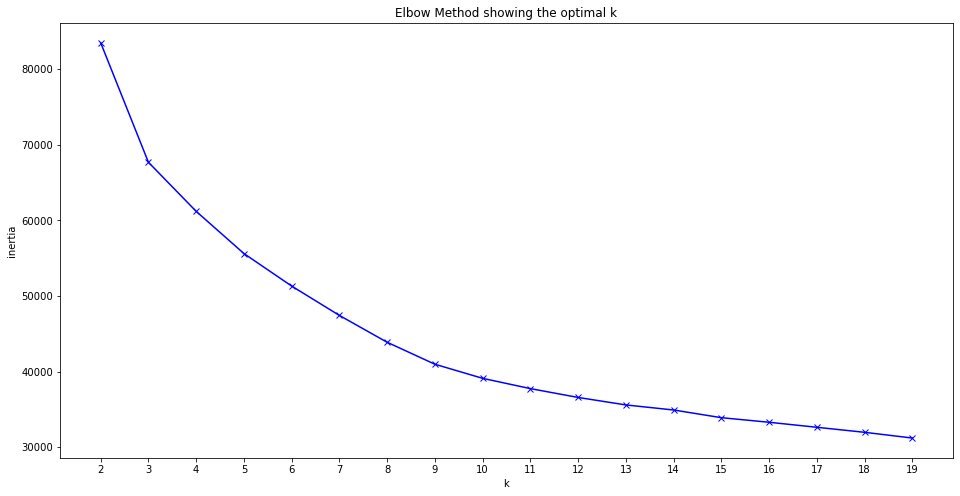

In [91]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Choosing k - Silhouette

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

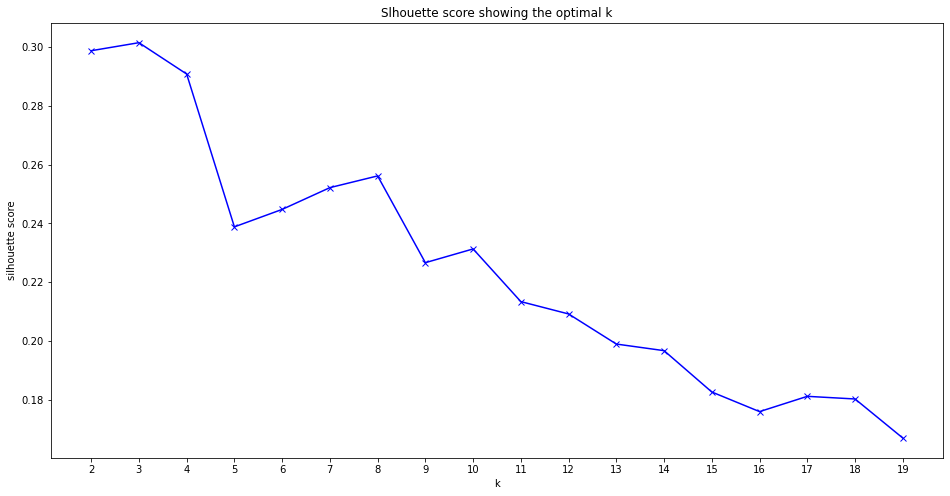

In [92]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [93]:
# I don't have a clear elbow with the Inertia but looking at both scores I would think the best number for k is 10

In [189]:
kmeans1 = KMeans(n_clusters=10)
kmeans1.fit(X_prep)

KMeans(n_clusters=10)

In [190]:
clusters = kmeans1.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    24214
1     7531
2     7026
3    10394
4    26273
5     9430
6    18648
7    15233
8     5970
9    16012
dtype: int64

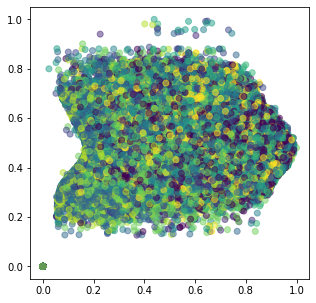

In [191]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:,10], c=clusters,alpha=0.5)
plt.show()

In [193]:
all_songs['clusters'] = kmeans1.labels_
all_songs.head(50)

,song,singer,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
0,(You Drive Me) Crazy,Britney Spears,0.748,0.939,0,-4.288,0,0.0341,0.053400,0.000000,0.3200,0.960,104.001,198067,4,6
1,Barbie Girl,Aqua,0.812,0.879,1,-10.998,0,0.0397,0.016700,0.224000,0.3660,0.962,129.991,197960,4,6
2,Coco Jamboo,Mr. President,0.832,0.838,1,-5.414,0,0.0421,0.079100,0.000000,0.1520,0.965,100.021,218733,4,6
3,Irresistible,Jessica Simpson,0.657,0.965,8,-2.771,0,0.0556,0.028500,0.000088,0.0552,0.669,93.013,194027,4,9
4,Uptown Girl - Radio Edit,Westlife,0.645,0.921,6,-5.256,0,0.0302,0.008090,0.000011,0.4070,0.864,129.000,186440,4,6
5,Mr. Vain - Original Radio Edit,Culture Beat,0.703,0.997,9,-7.666,0,0.0399,0.072600,0.023500,0.1230,0.391,132.872,257467,4,9
6,Larger Than Life,Backstreet Boys,0.661,0.973,0,-2.994,0,0.0370,0.110000,0.000017,0.6170,0.750,108.037,232827,4,6
7,Livin' la Vida Loca,Ricky Martin,0.425,0.954,1,-3.756,0,0.0476,0.004140,0.000000,0.0555,0.933,178.043,243160,4,6
8,María,Ricky Martin,0.723,0.914,7,-5.598,0,0.0663,0.072600,0.000021,0.9500,0.968,101.181,262573,4,9
9,Scatman (ski-ba-bop-ba-dop-bop),Scatman John,0.650,0.820,5,-10.900,0,0.0356,0.066200,0.002720,0.2150,0.757,135.982,215973,4,6


# Song recommender top 100 & Spotify

In [277]:
def recommender(df1, df2):    
    user_input = input("What is your favourite song?: ")
    
    if user_input.lower() in df1['song'].str.lower().values: 
        random_song = random.choice(df1['song'])
        
        if user_input.lower() == random_song.lower():
            random_song = random.choice(df1['song'])
        
        singer_song = df1[df1['song']==random_song]['artist'].values[0]
        print("We recommend the following song: ", random_song, "by", singer_song)
        again = input("Do you want to enter another song? y/n ")
        
        if again.lower() == 'y':
            recommender(df1, df2)
        else:
            print('Thank you for using our song recommender!')
            
    elif user_input.lower() in df2['song'].str.lower().values:
        
        match = df2.loc[df2["clusters"] == df2['clusters']]
        title = match.sample()["song"].values[0]
        singer = df2[df2['song']==title]['singer'].values[0]
        
        print("Based on the audio features we can recommend the following song: ", title , "by", singer)
        again = input("Do you want to enter another song? y/n ")
        
        if again.lower() == 'y':
            recommender(df1, df2)
        else:
            print('Thank you for using our song recommender!')
            
    else:
        print("We are sorry but we have no songs to recommend")
        again = input("Do you want to enter another song? y/n ")
        
        if again.lower() == 'y':
            recommender(df1, df2)
        else:
            print('Thank you for using our song recommender!')

In [187]:
len(all_songs)

140731

In [281]:
recommender(song_df, all_songs)

What is your favourite song?: burning love
Based on the audio features we can recommend the following song:  Sunset Breeze by AmPm
Do you want to enter another song? y/n n
Thank you for using our song recommender!
